In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *

### Set up 

In [80]:
#-----------------------------
#           PARAMETERS
#-----------------------------


good_listen_subjects = ['01', '02', '04', '05', '06', '07', '08', '09', '10', '11', '12']
good_motor_subjects = ['01', '04', '05', '06', '07', '08', '09', '10', '11', '12']
all_subjects = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
nonmusicians = ['01', '04', '05', '08', '09', '10', '11']
musicians = ['02', '06', '07', '12']

task = 'motor'
participants = 'all'

if task == 'listen' and participants == 'all':
    subjects_to_process = good_listen_subjects
elif task == 'motor' and participants == 'all':
    subjects_to_process = good_motor_subjects
elif participants == 'musicians':
    subjects_to_process = musicians
    if task == 'motor':
        musicians.pop(0)
elif participants == 'nonmusicians':
    subjects_to_process = nonmusicians


In [81]:
#-----------------------------
#           DIRECTORIES
#-----------------------------

evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data'
figs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/figures'

#get channel names
with open('../utils/ch_names.pkl', 'rb') as file:
    ch_names_all = pickle.load(file)

ch_names_72 = ch_names_all[0:72]
downfreq = 128

#### TO DO: take equal subsets from each participant?

In [82]:
#-----------------------------
#           GROUPING EVOKEDS
#-----------------------------

evoked_list_pre = []
epochs_list_pre = []
evoked_list_post = []
epochs_list_post = []

#subject averages
epochs_list_pre_sa =[]

#for file in sorted(os.listdir(evoked_dir)):

for subject in subjects_to_process:
    print('Processing subject: ', subject)

    file_evokeds_pre = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_pre_{subject}.fif'))[0]
    file_epochs_pre = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_pre_{subject}.fif'))[0]
  
    evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
    evoked_list_pre.append(evoked_pre)
    epochs_pre = mne.read_epochs(file_epochs_pre)
    epochs_list_pre.append(epochs_pre)

    file_evokeds_post = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_post_{subject}.fif'))[0]
    file_epochs_post = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_post_{subject}.fif'))[0]
  
    evoked_post = mne.read_evokeds(file_evokeds_post)[0]
    evoked_list_post.append(evoked_post)
    epochs_post = mne.read_epochs(file_epochs_post)
    epochs_list_post.append(epochs_post)


concat_epochs_pre = mne.concatenate_epochs(epochs_list_pre)
concat_evoked_pre = mne.combine_evoked(evoked_list_pre, weights = 'equal')

concat_epochs_post = mne.concatenate_epochs(epochs_list_post)
concat_evoked_post = mne.combine_evoked(evoked_list_post, weights = 'equal')


Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 353 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
353 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_01.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/moto

    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
245 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 215 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_05.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
215 matching events found
No baseline correction applied
0 projection items

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_05.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_post = mne.read_evokeds(file_evokeds_post)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:31: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_post_05.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_post = mne.read_epochs(file_epochs_post)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_dat

No baseline correction applied
0 projection items activated
Processing subject:  09
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 397 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_09.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
397 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_09.fif ...
    Found the 

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_09.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_09.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/moto

0 projection items activated
Processing subject:  12
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 287 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_12.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
287 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_post_12.fif ...
    Found the data of interest:
        t =  

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:21: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/motor_ERP_pre_12.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:23: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_epochs_data/motor_epochs_pre_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_21192/1353575689.py:29: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_ERP_data/moto

Not setting metadata
3168 matching events found
Applying baseline correction (mode: mean)


### Plot grand average

In [103]:
ts_args = {'ylim': dict(eeg=[-3, 3])}
topomap_args = {'vlim':(-3, 3)}

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


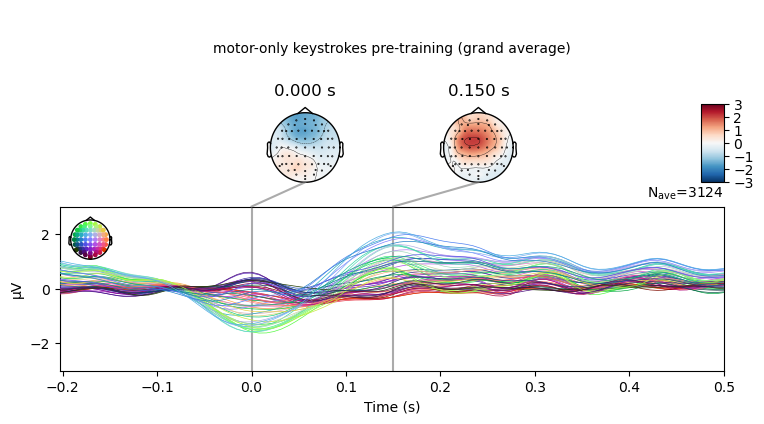

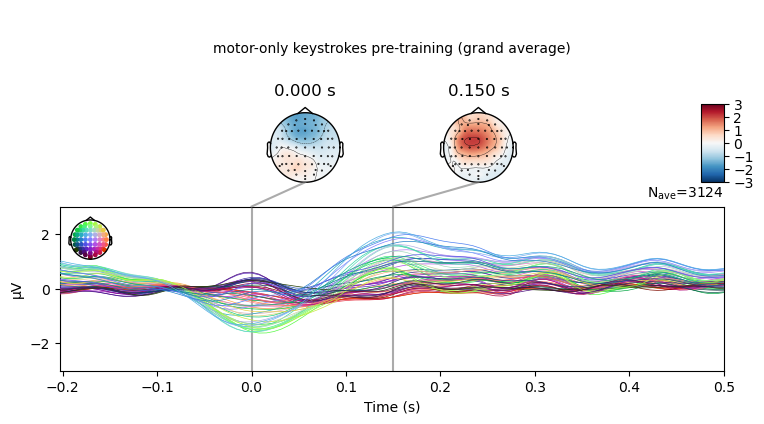

In [104]:
concat_evoked_pre.plot_joint(times =[ 0, 0.15], ts_args = ts_args, topomap_args = topomap_args, title= f'{task}-only keystrokes pre-training (grand average)')

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


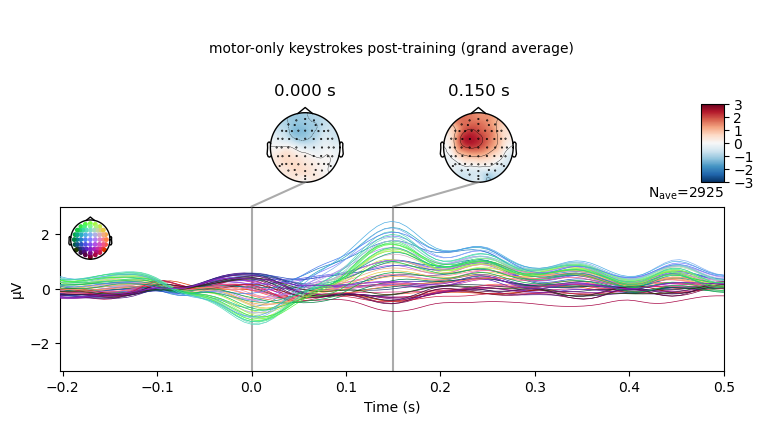

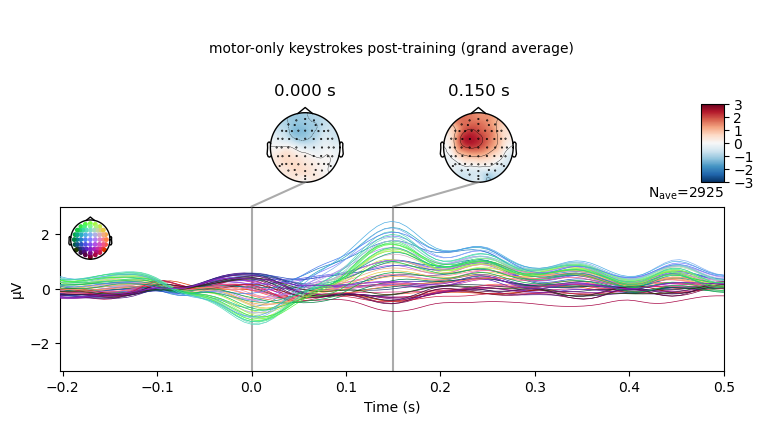

In [106]:
concat_evoked_post.plot_joint(times =[ 0, 0.15], ts_args = ts_args, topomap_args = topomap_args, title= f'{task}-only keystrokes post-training (grand average)')

In [86]:
#native compare evokeds function from mne 

"""ga = dict(
        pretraining=list(concat_epochs_pre.iter_evoked()),
        posttraining=list(concat_epochs_post.iter_evoked())
        )

mne.viz.plot_compare_evokeds(ga, title = f'{task} only grand average ERP (all channels)',combine = 'mean')
"""

"ga = dict(\n        pretraining=list(concat_epochs_pre.iter_evoked()),\n        posttraining=list(concat_epochs_post.iter_evoked())\n        )\n\nmne.viz.plot_compare_evokeds(ga, title = f'{task} only grand average ERP (all channels)',combine = 'mean')\n"

## Stats

#### Stats from all subjects
The stats are run on arrays obtained by calling get_data() on `concat_epochs_pre` and `concat_epochs_post`, which are saved as variables `test_pre`, and `test_post`: 
    shape = (3280, 72, 91) = (n_events, n_channels, n_timepoints)

In [87]:
#prepare data
test_pre = concat_epochs_pre.get_data()
test_post = concat_epochs_post.get_data()

n_events = test_pre.shape[0]
n_channels = test_pre.shape[1]
n_timepoints = test_pre.shape[2]

to_compare = [test_pre, test_post]

#channels of interest
p_channels = ['Cz', 'FCz']
eeg_channels = ch_names_72[0:64]
p_ch_idx = ch_index(p_channels)

#CHOOSING CHANNELS TO TEST
ch_totest = p_channels #'all' or p_channels

#### Timepoint stats

In [88]:
#within subjects stats
#getting data from evoked objects
diff_evoked_list = [evoked1.get_data() - evoked2.get_data() for evoked1, evoked2 in zip(evoked_list_post, evoked_list_pre)]
diff_evoked_sa = np.stack(diff_evoked_list)

In [89]:
#calculate p-value over time
p_values = p_times(to_compare, channels = ch_totest) #independent t-test
p_within = p_times_1sample(diff_evoked_sa, channels = ch_totest) #1-sample t-tests (effectively like within-subjects)

Calculating p-value over ['Cz', 'FCz']
Calculating p-value over ['Cz', 'FCz']
Distribution is not normal. p =  0.007777471878854844


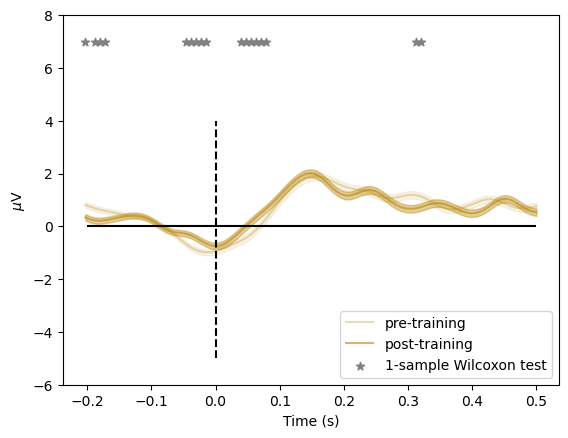

In [90]:
######################
# COMPARISON FIGURE
######################
plot_labels = ['pre-training', 'post-training']

#time vector
erp_times = concat_epochs_post.times

plt.figure()
shade = 0.3

for i, data in enumerate(to_compare):
    

    if ch_totest == 'all':
        plt.title(f'{task} ERP averaged over all channels')
        mean_data = data.mean(axis=0)[0:64].mean(axis = 0)
        sem_data = data.std(axis=0)[0:64].mean(axis = 0) / np.sqrt(data.shape[0])

    elif ch_totest == p_channels:

        plt.title(f'{task} ERP averaged over {p_channels} channels')
        mean_data = data.mean(axis=0)[p_ch_idx].mean(axis = 0)
        sem_data = data.std(axis=0)[p_ch_idx].mean(axis = 0) / np.sqrt(data.shape[0])


    #rescale data
    mean_data = np.array([x * 1000000 for x in mean_data])
    sem_data = np.array([x * 1000000 for x in sem_data])

    plt.plot(erp_times, mean_data, label=plot_labels[i], color = 'darkgoldenrod', alpha = shade)
    plt.fill_between(erp_times, mean_data - sem_data, mean_data + sem_data, color = 'darkgoldenrod', alpha=shade-0.2)
    shade += 0.3



#############################
#plot significant points
###############################
#find timepoints where ERP is significantly different
sig_idx_ind = [index for index, item in enumerate(p_values) if item < 0.05]
sig_idx_within = [index for index, item in enumerate(p_within) if item < 0.05]

#get y values
max_y = max(np.max(test_pre), np.max(test_post))  
y_ind = [7.5]*len(sig_idx_ind)
y_within = [7]*len(sig_idx_within)
plt.scatter(erp_times[sig_idx_within], y_within, marker="*", color='grey', label = '1-sample Wilcoxon test')
#plt.scatter(erp_times[sig_idx_ind], y_ind, marker="*", color='rosybrown', label = 'independent t-test')


#aesthetics
plt.title('')
plt.hlines(0, -0.2, 0.5, color = 'black')
plt.vlines(0, -5, 4, color = 'black', linestyles= '--')
plt.ylabel('$\mu$V')
plt.xlabel('Time (s)')
plt.ylim(-6,8)
plt.legend(loc = 'lower right')

plt.savefig(figs_dir+f'/ERP_{task}_{participants}.svg')

Text(0.5, 1.0, 'motor-only: difference post-pre')

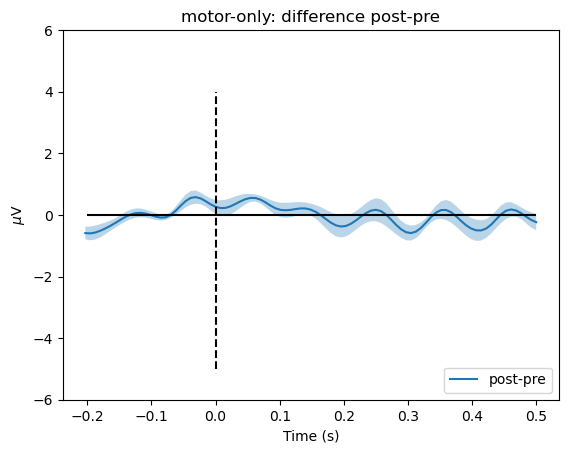

In [91]:
#################################
#       DIFFERENCE POST-PRE
#################################

data = diff_evoked_sa
mean_data = data.mean(axis=0)[p_ch_idx].mean(axis = 0)
sem_data = data.std(axis=0)[p_ch_idx].mean(axis = 0) / np.sqrt(data.shape[0])

#rescale data
mean_data = np.array([x * 1000000 for x in mean_data])
sem_data = np.array([x * 1000000 for x in sem_data])

plt.plot(erp_times, mean_data, label='post-pre')
plt.fill_between(erp_times, mean_data - sem_data, mean_data + sem_data, alpha=0.3)

#aesthetics
plt.hlines(0, -0.2, 0.5, color = 'black')
plt.vlines(0, -5, 4, color = 'black', linestyles= '--')
plt.ylabel('$\mu$V')
plt.xlabel('Time (s)')
plt.ylim(-6,6)
plt.legend(loc = 'lower right')
plt.title(f"{task}-only: difference post-pre")

Save data for comparison

In [92]:
"""
np.save('erp_times.npy', erp_times)

#task erps
np.save(f'{task}_{participants}_pre.npy', to_compare[0])
np.save(f'{task}_{participants}_post.npy', to_compare[1])

#before and after
np.save(f'{task}_diff.npy', diff_evoked_sa)"""

"\nnp.save('erp_times.npy', erp_times)\n\n#task erps\nnp.save(f'{task}_{participants}_pre.npy', to_compare[0])\nnp.save(f'{task}_{participants}_post.npy', to_compare[1])\n\n#before and after\nnp.save(f'{task}_diff.npy', diff_evoked_sa)"

#### Channel stats

In [93]:
#choosing times where there are significant differences
timepoint  = 0
time_idx = min(range(len(erp_times)), key=lambda i: abs(erp_times[i] - timepoint))


In [94]:
#calculating p values over channels
p_values_ch = p_chs(to_compare, time_idx)

#scaling p values
p_values_ch_scaled = scale_p_channels(p_values_ch)



To do: put some text and a colourbar??

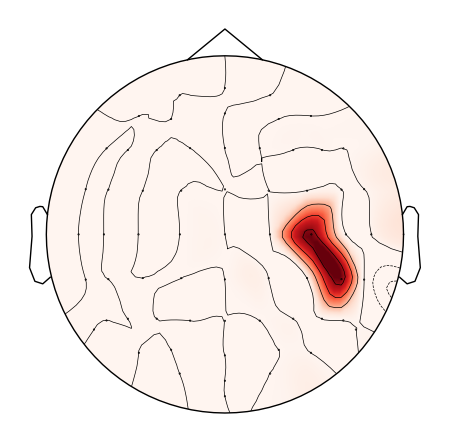

In [95]:

fig, axes = plt.subplots()  # Use plt.subplots() to create a figure and axes
im, cn = mne.viz.plot_topomap(p_values_ch_scaled, pos=concat_epochs_pre.info, size=4, cmap='Reds', axes=axes)  # Pass the axes object to the plot_topomap function
#axes.text(0.5, 0.1, "Your Text Here", fontsize=12, color='black', ha='center', va='center')
#fig.set_title('h')

### Listen and motor comparisons

In [96]:
def data_toplot(data, p_ch_idx):
    mean_data = data.mean(axis=0)[p_ch_idx].mean(axis = 0)
    sem_data = data.std(axis=0)[p_ch_idx].mean(axis = 0) / np.sqrt(data.shape[0])

    #rescale data
    mean_data = np.array([x * 1000000 for x in mean_data])
    sem_data = np.array([x * 1000000 for x in sem_data])

    return mean_data, sem_data

Listen pre-post vs motor

Text(0.5, 1.0, 'Listen pre-post difference vs motor ERP')

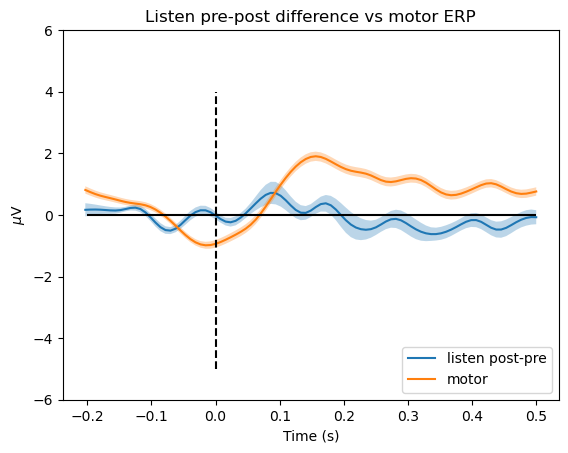

In [97]:
listen_diff = np.load('listen_diff.npy')
motor_pre = np.load('motor_all_pre.npy')

#averaging
listen_diff_mean, listen_diff_sem = data_toplot(listen_diff, p_ch_idx)
motor_pre_mean, motor_pre_sem = data_toplot(motor_pre, p_ch_idx)


#plotting

plt.plot(erp_times, listen_diff_mean, label = 'listen post-pre')
plt.plot(erp_times, motor_pre_mean, label='motor')
plt.fill_between(erp_times, listen_diff_mean-listen_diff_sem, listen_diff_mean+listen_diff_sem, alpha = 0.3)
plt.fill_between(erp_times, motor_pre_mean-motor_pre_sem, motor_pre_mean+motor_pre_sem, alpha=0.3)


#aesthetics
plt.hlines(0, -0.2, 0.5, color = 'black')
plt.vlines(0, -5, 4, color = 'black', linestyles= '--')
plt.ylabel('$\mu$V')
plt.xlabel('Time (s)')
plt.ylim(-6,6)
plt.legend(loc = 'lower right')
plt.title('Listen pre-post difference vs motor ERP')

Text(0.5, 1.0, 'Motor pre-post difference vs listen ERP')

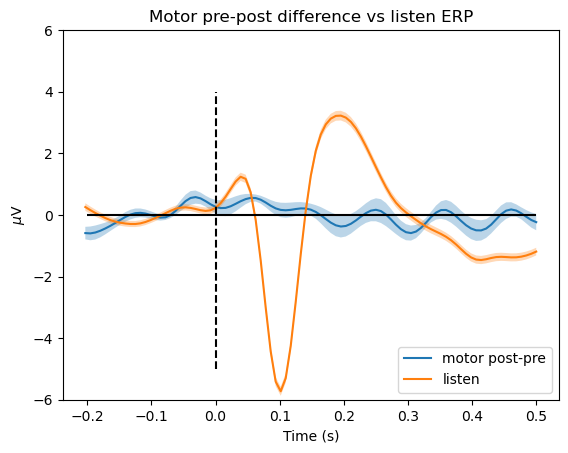

In [98]:
motor_diff = np.load('motor_diff.npy')
listen_pre = np.load('listen_all_pre.npy')

#averaging
motor_diff_mean, motor_diff_sem = data_toplot(motor_diff, p_ch_idx)
listen_pre_mean, listen_pre_sem = data_toplot(listen_pre, p_ch_idx)


#plotting

plt.plot(erp_times, motor_diff_mean, label = 'motor post-pre')
plt.plot(erp_times, listen_pre_mean, label='listen')
plt.fill_between(erp_times, motor_diff_mean-motor_diff_sem, motor_diff_mean+motor_diff_sem, alpha = 0.3)
plt.fill_between(erp_times, listen_pre_mean-listen_pre_sem, listen_pre_mean+listen_pre_sem, alpha=0.3)


#aesthetics
plt.hlines(0, -0.2, 0.5, color = 'black')
plt.vlines(0, -5, 4, color = 'black', linestyles= '--')
plt.ylabel('$\mu$V')
plt.xlabel('Time (s)')
plt.ylim(-6,6)
plt.legend(loc = 'lower right')
plt.title('Motor pre-post difference vs listen ERP')
